In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignments/Individual Project 4/Live.csv")

In [19]:
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [21]:
X = data.drop(["status_id","status_type","status_published", "Column1","Column2","Column3","Column4"], axis = 1)

In [22]:
X.columns

Index(['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves',
       'num_wows', 'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

##K Means

In [27]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state = 42)

##Elbow Visualizer 

Finding the best k score (best = 4 & 2)

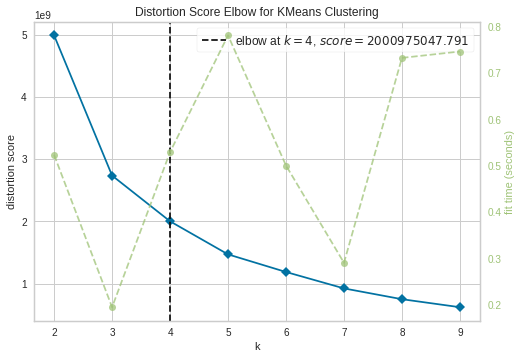

In [28]:
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(X)
visualizer.show()
plt.show()

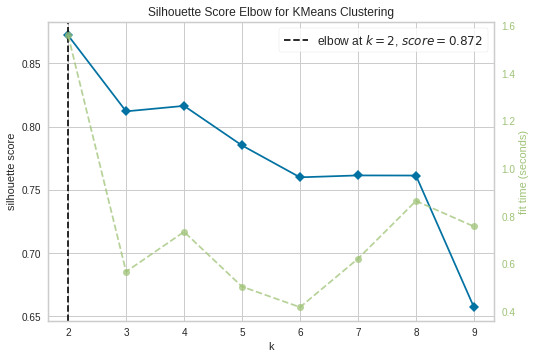

In [29]:
#added metric = silhouette
visualizer = KElbowVisualizer(km, k = (2,10), metric = 'silhouette')
visualizer.fit(X)
visualizer.show()
plt.show()

In [30]:
KM = KMeans(n_clusters=4, random_state = 42)

###Adding clusters to dataset

In [31]:
y_pred = km.fit_predict(X)
X['cluster'] = y_pred
X.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,529,512,262,432,92,3,1,1,0,0
1,150,0,0,150,0,0,0,0,0,3
2,227,236,57,204,21,1,1,0,0,0
3,111,0,0,111,0,0,0,0,0,3
4,213,0,0,204,9,0,0,0,0,0


###Visualizing

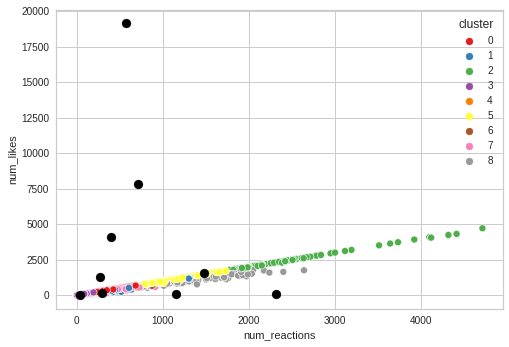

In [34]:
sns.scatterplot('num_reactions','num_likes', data = X
                ,hue = X['cluster'],
                palette = 'Set1', 
                legend = 'full')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],
            marker = 'o', s = 80, c = 'black')